# Medidas de posição e dispersão
------------

### Média aritmética, moda e mediana – dados não agrupados

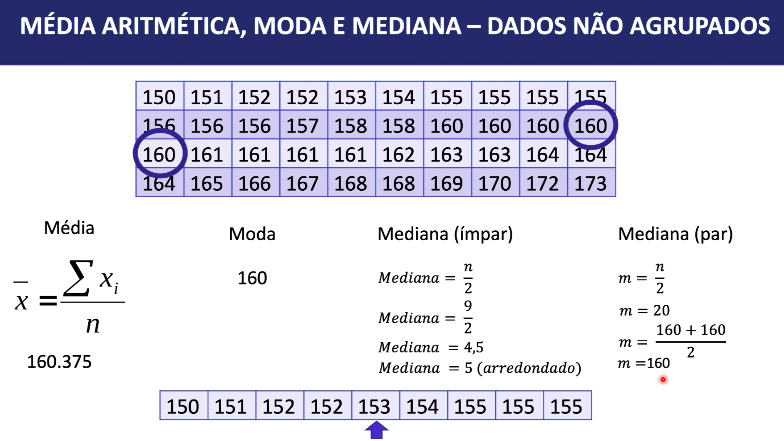

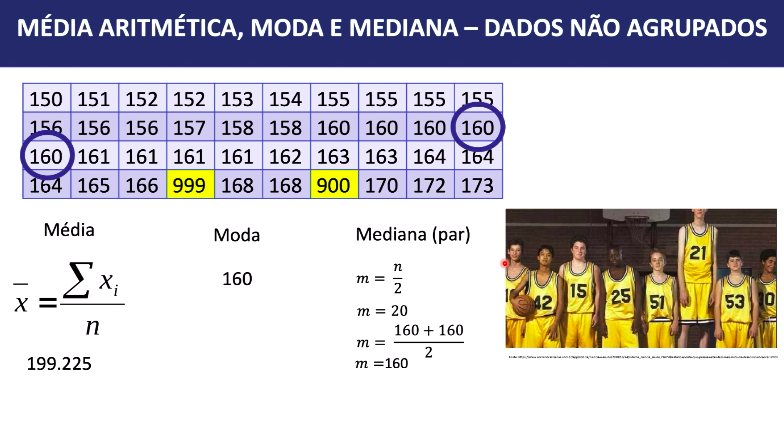

### Média aritmética, moda e mediana – implementação

In [1]:
import numpy as np
import statistics
from scipy import stats
import math

In [2]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

In [3]:
dados.sum() / len(dados)

160.375

In [4]:
dados.mean()

160.375

In [5]:
statistics.mean(dados)

160

In [6]:
statistics.mode(dados)

160

In [7]:
stats.mode(dados)

ModeResult(mode=array([160]), count=array([5]))

In [8]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

In [9]:
posicao = len(dados_impar) / 2
posicao

4.5

In [10]:
posicao = math.ceil(posicao)
posicao

5

In [11]:
dados_impar[posicao - 1]

153

In [12]:
posicao = len(dados) // 2
posicao

20

In [13]:
dados[posicao - 1], dados[posicao]

(160, 160)

In [14]:
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

160.0

In [15]:
np.median(dados_impar)

153.0

In [16]:
np.median(dados)

160.0

In [17]:
statistics.median(dados_impar)

153

In [18]:
statistics.median(dados)

160.0

### Média aritmética ponderada

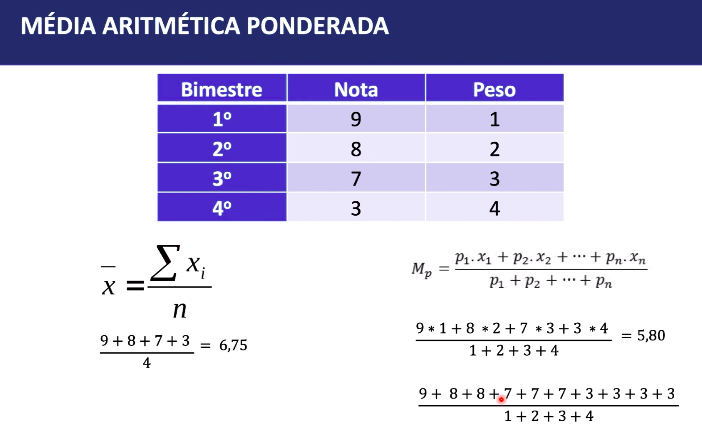

In [19]:
notas = np.array([9,8,7,3])
pesos = np.array([1,2,3,4])

In [20]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
media_ponderada

5.8

In [21]:
np.average(notas, weights=pesos)

5.8

### Média aritmética, moda e mediana – dados agrupados

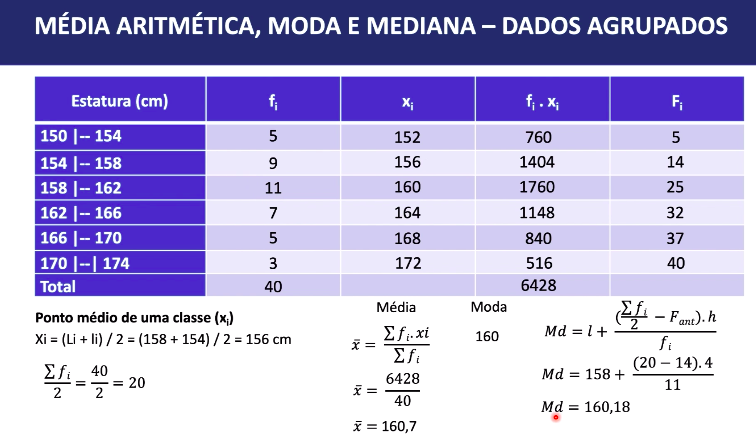

### Média aritmética, moda e mediana – implementação

In [22]:
import pandas as pd

In [23]:
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [24]:
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [25]:
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2

In [26]:
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [27]:
dataset['fi*xi'] = dataset['fi'] * dataset['xi']

In [28]:
dataset

,inferior,superior,fi,xi,fi*xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [29]:
dataset['Fi'] = dataset['fi'].cumsum()

In [30]:
dataset

,inferior,superior,fi,xi,fi*xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [31]:
mediana = dataset['fi*xi'].sum() / dataset['fi'].sum()
mediana

160.7

In [32]:
moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]
moda

160.0

In [33]:
fi = dataset['fi'].sum() / 2
fi

20.0

In [34]:
l, fi_l = dataset[dataset['Fi'] >= fi].iloc[0][[0, 2]].values
l, fi_l

(158.0, 11.0)

In [35]:
Fant = dataset[dataset['Fi'] <= fi].iloc[-1][-1] 
Fant

14.0

In [36]:
h = (dataset['superior'] - dataset['inferior']).mean()
h

4.0

In [37]:
mediana = l + (((fi - Fant) * h) / fi_l)
mediana

160.1818181818182

### Média geométrica, harmônica e quadrática

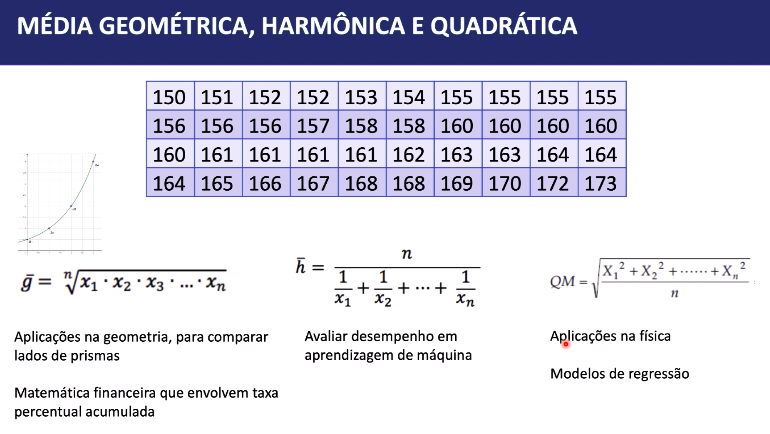

#### média geométrica

In [38]:
from scipy.stats.mstats import gmean

In [39]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

In [40]:
gmean(dados)

160.26958390038905

#### média harmônica

In [41]:
from scipy.stats.mstats import hmean

In [42]:
hmean(dados)

160.16471947994674

#### média quadrática

In [43]:
def qmean(l):
  return math.sqrt(sum(l * l) / len(l))

In [44]:
qmean(dados)

160.48091786876097

### Quartis - dados não agrupados

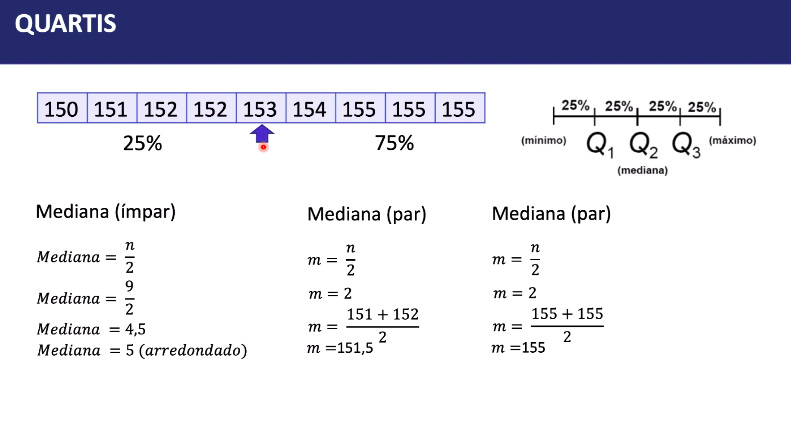

### Quartis - implementação

In [45]:
dados_impar

[150, 151, 152, 152, 153, 154, 155, 155, 155]

In [46]:
np.median(dados_impar)

153.0

In [47]:
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [48]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [49]:
np.median(esquerda)

151.5

In [50]:
direita = dados_impar[posicao_mediana+1:]
direita

[154, 155, 155, 155]

In [51]:
np.median(direita)

155.0

In [52]:
np.quantile(dados_impar, 0.5)

153.0

In [53]:
np.quantile(dados_impar, 0.75)

155.0

In [54]:
np.quantile(dados_impar, 0.25)

152.0

In [55]:
np.quantile(dados, 0.25), np.quantile(dados, 0.5), np.quantile(dados, 0.75)

(155.75, 160.0, 164.0)

In [56]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados,75)

(155.75, 160.0, 164.0)

In [57]:
pd.DataFrame(dados).quantile([0.25, 0.50, 0.75])

,0
0.25,155.75
0.50,160.00
0.75,164.00


In [58]:
pd.DataFrame(dados).describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


### Quartis - dados agrupados

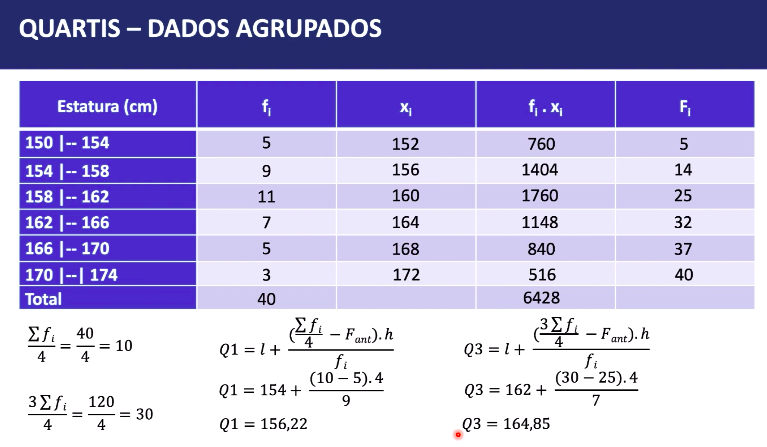

In [59]:
dataset

,inferior,superior,fi,xi,fi*xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [60]:
def get_quartil(dataframe, q1 = True):
  if q1 == True:
    fi_4 = dataset['fi'].sum() / 4
  else:
    fi_4 = (3 * dataset['fi'].sum()) / 4
  
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for linha in dataset.iterrows():
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_4:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  q = limite_inferior + ((fi_4 - Fi_anterior) * 4) / frequencia_classe

  return q

In [61]:
get_quartil(dataset), get_quartil(dataset, False)

(156.22222222222223, 164.85714285714286)

### Percentis

In [62]:
np.median(dados)

160.0

In [63]:
np.quantile(dados, 0.5)

160.0

In [64]:
np.percentile(dados, 50)

160.0

In [65]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 95)

(151.95000000000002, 152.89999999999998, 170.1)

In [66]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 95)

(151.95000000000002, 152.89999999999998, 170.1)

In [67]:
pd.DataFrame(dados).quantile([0.05, 0.1, 0.95])

,0
0.05,151.95
0.10,152.90
0.95,170.10


### EXERCÍCIO

In [68]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/census.csv'

In [69]:
dataset_census = pd.read_csv(path)

In [70]:
dataset_census.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [71]:
data_age = dataset_census['age'].values

In [72]:
np.mean(data_age)

38.58164675532078

In [73]:
hmean(data_age)

33.91874139089839

In [74]:
gmean(data_age)

36.210879158177256

In [75]:
qmean(data_age)

40.9218664329987

In [76]:
np.median(data_age)

37.0

In [77]:
stats.mode(data_age)

ModeResult(mode=array([36]), count=array([898]))

### Amplitude amostral e diferença interquartil

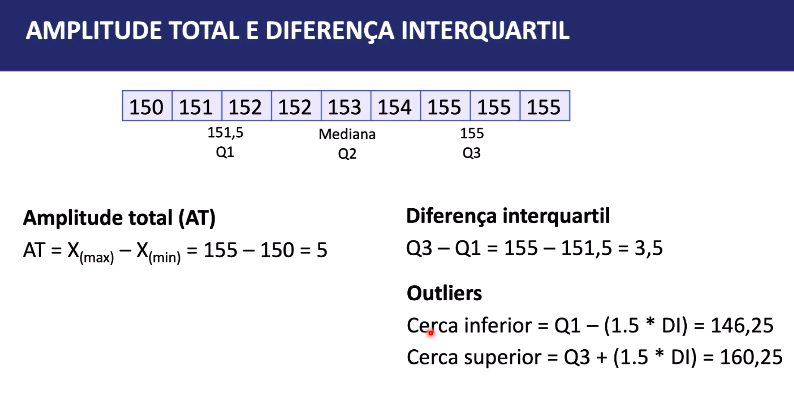

In [78]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

#### Amplitude

In [79]:
dados.max() - dados.min()

23

In [80]:
q1 = np.quantile(dados, 0.25)
q3 = np.quantile(dados, 0.75)
q1, q3

(155.75, 164.0)

In [81]:
diferenca_interquartil = q3 - q1
diferenca_interquartil

8.25

#### Detacção de outlier

In [82]:
inferior = q1 - (1.5 * diferenca_interquartil)
inferior

143.375

In [83]:
superior = q3 + (1.5 * diferenca_interquartil)
superior

176.375

### Variância - dados não agrupados

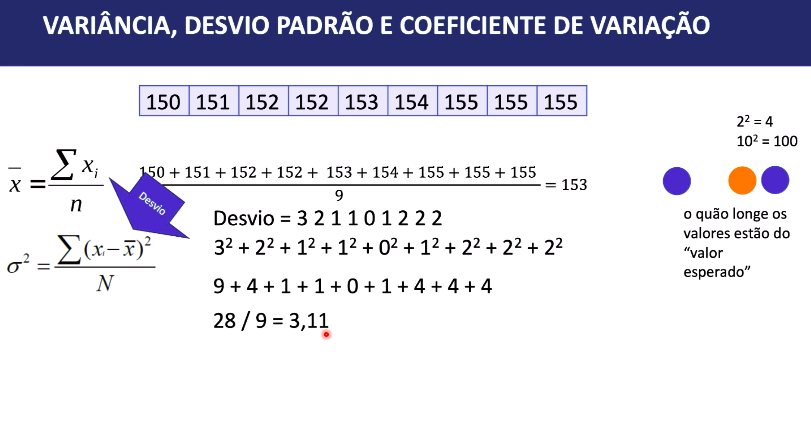

### Variância - implementação

In [84]:
dados_impar = np.array(dados_impar)

In [85]:
media = dados_impar.sum() / len(dados_impar)
media

153.0

In [86]:
desvio = abs(dados_impar - media)
desvio

array([3., 2., 1., 1., 0., 1., 2., 2., 2.])

In [87]:
desvio = desvio ** 2
desvio

array([9., 4., 1., 1., 0., 1., 4., 4., 4.])

In [88]:
v = desvio.sum() / len(dados_impar)
v

3.111111111111111

In [89]:
dados_impar.var()

3.111111111111111

In [90]:
np.var(dados)

33.984375

In [91]:
statistics.variance(dados)

34

In [92]:
from scipy import  ndimage

In [93]:
ndimage.variance(dados)

33.984375

### Desvio padrão - teoria e implementação

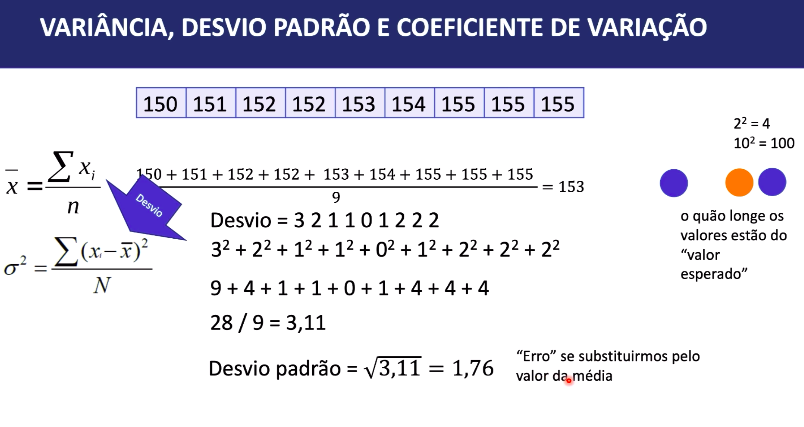

In [94]:
math.sqrt(v)

1.7638342073763937

In [95]:
np.std(dados_impar)

1.7638342073763937

In [96]:
np.std(dados) # Em média a altura está variando 5.82 cm com relação a média

5.829611908180509

In [97]:
stats.tstd(dados, ddof=0)

5.829611908180509

### Coeficiente de variação - teoria e implementação

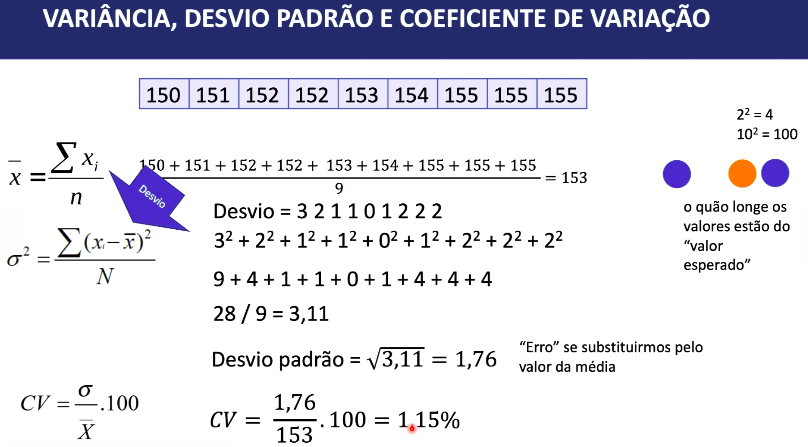

In [98]:
stats.variation(dados_impar) * 100

1.1528328152786886

In [99]:
stats.variation(dados) * 100

3.634987939629312

### Desvio padrão com dados agrupados

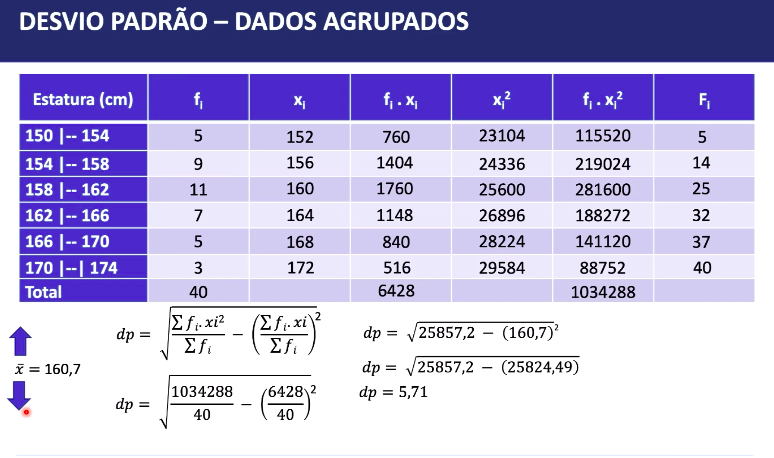

### Desvio padrão com dados agrupados - implementação

In [101]:
dataset

,inferior,superior,fi,xi,fi*xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [102]:
dataset['xi_2'] = dataset['xi'] * dataset['xi']

In [103]:
dataset

,inferior,superior,fi,xi,fi*xi,Fi,xi_2
0,150,154,5,152.0,760.0,5,23104.0
1,154,158,9,156.0,1404.0,14,24336.0
2,158,162,11,160.0,1760.0,25,25600.0
3,162,166,7,164.0,1148.0,32,26896.0
4,166,170,5,168.0,840.0,37,28224.0
5,170,174,3,172.0,516.0,40,29584.0


In [104]:
dataset['fi_xi_2'] = dataset['fi'] * dataset['xi_2']
dataset

,inferior,superior,fi,xi,fi*xi,Fi,xi_2,fi_xi_2
0,150,154,5,152.0,760.0,5,23104.0,115520.0
1,154,158,9,156.0,1404.0,14,24336.0,219024.0
2,158,162,11,160.0,1760.0,25,25600.0,281600.0
3,162,166,7,164.0,1148.0,32,26896.0,188272.0
4,166,170,5,168.0,840.0,37,28224.0,141120.0
5,170,174,3,172.0,516.0,40,29584.0,88752.0


In [105]:
dataset.columns

Index(['inferior', 'superior', 'fi', 'xi', 'fi*xi', 'Fi', 'xi_2', 'fi_xi_2'], dtype='object')

In [106]:
cols = ['inferior', 'superior', 'fi', 'xi', 'fi*xi', 'xi_2', 'fi_xi_2', 'Fi']

In [107]:
dataset = dataset[cols]

In [108]:
dataset

,inferior,superior,fi,xi,fi*xi,xi_2,fi_xi_2,Fi
0,150,154,5,152.0,760.0,23104.0,115520.0,5
1,154,158,9,156.0,1404.0,24336.0,219024.0,14
2,158,162,11,160.0,1760.0,25600.0,281600.0,25
3,162,166,7,164.0,1148.0,26896.0,188272.0,32
4,166,170,5,168.0,840.0,28224.0,141120.0,37
5,170,174,3,172.0,516.0,29584.0,88752.0,40


In [109]:
dp = np.sqrt((dataset['fi_xi_2'].sum() / dataset['fi'].sum()) - math.pow((dataset['fi*xi'].sum() / dataset['fi'].sum()), 2))

In [110]:
dp

5.719265687131764

### Árvores de decisão

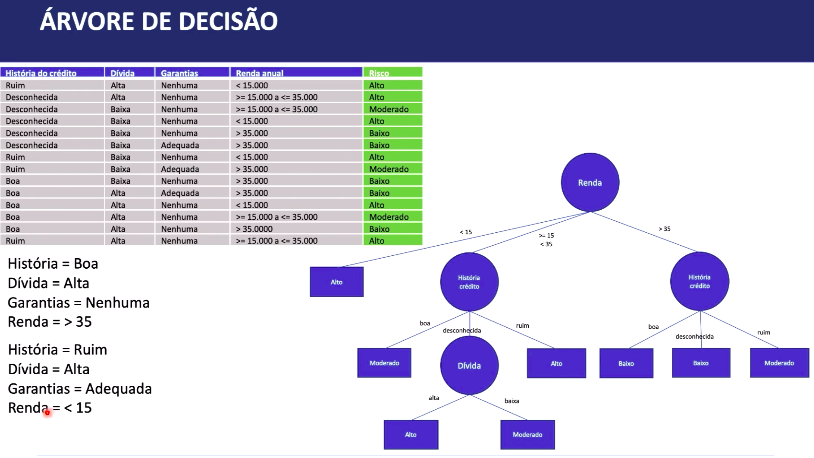

### Regressão logística

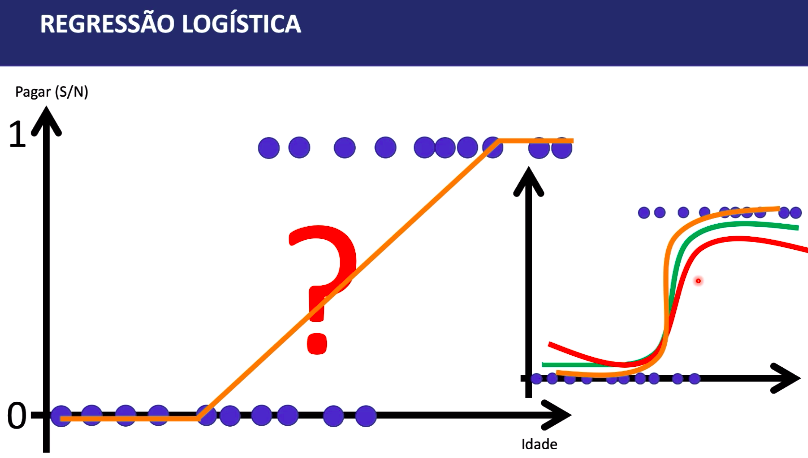

### Avaliação de algoritmos de machine learning

In [111]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/credit_data.csv'

In [112]:
dataset_credit_data = pd.read_csv(path)

In [113]:
dataset_credit_data.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [114]:
dataset_credit_data.dropna(inplace=True)

In [115]:
dataset_credit_data.shape

(1997, 5)

In [116]:
dataset_credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [117]:
x = dataset_credit_data.iloc[:, 1:4].values

In [118]:
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [119]:
y = dataset_credit_data.iloc[:, 4].values

In [120]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [123]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []

for i in range(30):
  x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                    test_size=0.2,
                                                                    stratify=y,
                                                                    random_state=i)
  
  
  naive_bayes = GaussianNB()
  naive_bayes.fit(x_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(x_teste)))


  logistica = LogisticRegression()
  logistica.fit(x_treinamento, y_treinamento)
  resultados_logistica.append(accuracy_score(y_teste, logistica.predict(x_teste)))


  random_forest = RandomForestClassifier()
  random_forest.fit(x_treinamento, y_treinamento)
  resultados_forest.append(accuracy_score(y_teste, random_forest.predict(x_teste)))


In [125]:
print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [126]:
print(resultados_logistica)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [127]:
print(resultados_forest)

[0.9775, 0.99, 0.9825, 0.9975, 0.985, 0.99, 0.9875, 0.98, 0.975, 0.985, 0.9875, 0.98, 0.9775, 0.985, 0.98, 0.985, 0.9875, 0.985, 0.99, 0.9875, 0.9825, 0.975, 0.98, 0.9825, 0.9825, 0.9925, 0.9875, 0.98, 0.985, 0.99]


#### Média

In [128]:
resultados_forest = np.array(resultados_forest)
resultados_logistica = np.array(resultados_logistica)
resultados_naive_bayes = np.array(resultados_naive_bayes)

In [129]:
resultados_forest.mean(), resultados_logistica.mean(), resultados_naive_bayes.mean()

(0.9844166666666666, 0.9145, 0.92425)

#### Moda

In [130]:
stats.mode(resultados_naive_bayes)

ModeResult(mode=array([0.9175]), count=array([5]))

In [131]:
stats.mode(resultados_logistica)

ModeResult(mode=array([0.9075]), count=array([4]))

In [132]:
stats.mode(resultados_forest)

ModeResult(mode=array([0.985]), count=array([6]))

#### Mediana

In [133]:
np.median(resultados_forest), np.median(resultados_logistica), np.median(resultados_naive_bayes)

(0.985, 0.9125, 0.925)

#### Variância

In [135]:
np.set_printoptions(suppress=True)
np.var(resultados_forest), np.var(resultados_logistica), np.var(resultados_naive_bayes)

(2.6534722222222325e-05, 0.00020933333333333337, 8.756250000000001e-05)

In [136]:
np.min([2.6534722222222325e-05, 0.00020933333333333337, 8.756250000000001e-05])

2.6534722222222325e-05

In [137]:
np.max([2.6534722222222325e-05, 0.00020933333333333337, 8.756250000000001e-05])

0.00020933333333333337

#### Desvio padrão

In [138]:
np.std(resultados_forest), np.std(resultados_logistica), np.std(resultados_naive_bayes)

(0.0051511864868418735, 0.014468356276140472, 0.00935748363610645)

#### Coeficiente de variação

In [139]:
(stats.variation(resultados_forest) * 100, 
 stats.variation(resultados_logistica) * 100,
 stats.variation(resultados_naive_bayes) * 100)

(0.5232729860501354, 1.5821056616884057, 1.0124407504578252)

### Validação cruzada

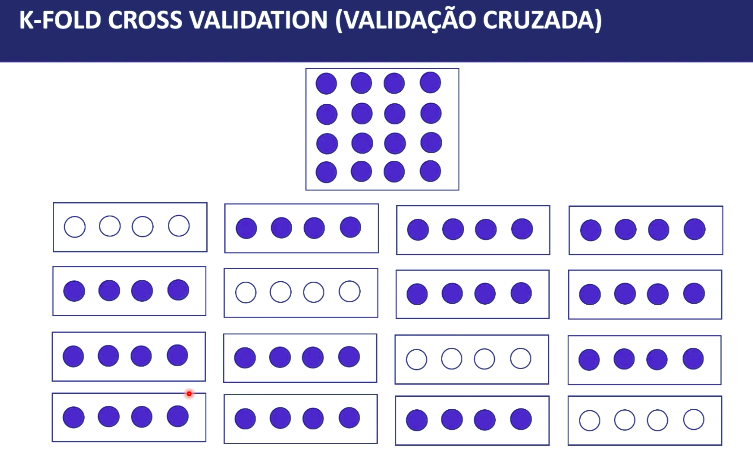

In [140]:
from sklearn.model_selection import cross_val_score, KFold

In [141]:
resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)  
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, x, y, cv=kfold)
  resultados_naive_bayes_cv.append(scores.mean())


  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x, y, cv=kfold)
  resultados_logistica_cv.append(scores.mean())


  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, x, y, cv=kfold)
  resultados_forest_cv.append(scores.mean())


In [142]:
print(resultados_forest_cv)

[0.9879773869346733, 0.9864824120603014, 0.9844748743718593, 0.9849698492462313, 0.9879798994974875, 0.9844824120603015, 0.9879748743718594, 0.9859874371859296, 0.9879798994974875, 0.9869798994974873, 0.9884798994974874, 0.9869723618090452, 0.9874773869346735, 0.9904773869346734, 0.9869874371859296, 0.9889849246231156, 0.9889899497487438, 0.9869723618090452, 0.9874824120603016, 0.9854824120603014, 0.9859773869346734, 0.9879849246231156, 0.9844798994974875, 0.9889773869346733, 0.9879798994974875, 0.9874899497487437, 0.9849773869346734, 0.9874748743718593, 0.9879899497487438, 0.9879874371859296]


In [ ]:
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)

In [143]:
(stats.variation(resultados_forest) * 100, 
 stats.variation(resultados_logistica) * 100,
 stats.variation(resultados_naive_bayes) * 100)

(0.5232729860501354, 1.5821056616884057, 1.0124407504578252)

In [144]:
(stats.variation(resultados_forest_cv) * 100, 
 stats.variation(resultados_logistica_cv) * 100,
 stats.variation(resultados_naive_bayes_cv) * 100)

(0.1500779694256076, 0.38801026116292653, 0.08641071566366061)

### Seleção de atributos com variância

In [145]:
np.random.rand(50)

array([0.33812296, 0.85580332, 0.85741175, 0.75515564, 0.29955   ,
       0.02409402, 0.5265085 , 0.47582284, 0.35914942, 0.34655201,
       0.13899598, 0.05348804, 0.13031306, 0.14370565, 0.03509686,
       0.96388955, 0.2674834 , 0.36182588, 0.71807729, 0.44831656,
       0.58910084, 0.61262311, 0.67055957, 0.21318838, 0.64224996,
       0.38063021, 0.43582025, 0.89598438, 0.51169104, 0.62476435,
       0.93779051, 0.77279054, 0.12976868, 0.05378994, 0.26326326,
       0.3725304 , 0.25111697, 0.43231915, 0.4971936 , 0.35857294,
       0.83663847, 0.58093134, 0.44310309, 0.61986599, 0.8736124 ,
       0.87688231, 0.46382928, 0.53912267, 0.76942075, 0.99002265])

In [146]:
np.random.randint(0, 2)

0

In [147]:
base_selecao = {'a': np.random.rand(20),
                'b': np.array([0.5] * 20),
                'classe': np.random.randint(0, 2, size=20)}

In [148]:
base_selecao

{'a': array([0.76715618, 0.50815758, 0.8073895 , 0.32053542, 0.89302867,
        0.12678714, 0.4843589 , 0.469463  , 0.79521799, 0.53156979,
        0.83481087, 0.92106973, 0.86841996, 0.73580865, 0.18447315,
        0.33572945, 0.91117994, 0.99076999, 0.83196414, 0.75545864]),
 'b': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'classe': array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])}

In [149]:
dataset_teste = pd.DataFrame(base_selecao)

In [150]:
dataset_teste.head()

,a,b,classe
0,0.767156,0.5,1
1,0.508158,0.5,0
2,0.807390,0.5,0
3,0.320535,0.5,0
4,0.893029,0.5,0


In [151]:
dataset_teste.describe()

,a,b,classe
count,20.000000,20.0,20.000000
mean,0.653667,0.5,0.450000
std,0.261736,0.0,0.510418
min,0.126787,0.5,0.000000
25%,0.480635,0.5,0.000000
50%,0.761307,0.5,0.000000
75%,0.843213,0.5,1.000000
max,0.990770,0.5,1.000000


In [152]:
np.var(dataset_teste['a']), np.var(dataset_teste['b'])

(0.06508052577333033, 0.0)

In [154]:
x = dataset_teste.iloc[:, 0:2].values
x

array([[0.76715618, 0.5       ],
       [0.50815758, 0.5       ],
       [0.8073895 , 0.5       ],
       [0.32053542, 0.5       ],
       [0.89302867, 0.5       ],
       [0.12678714, 0.5       ],
       [0.4843589 , 0.5       ],
       [0.469463  , 0.5       ],
       [0.79521799, 0.5       ],
       [0.53156979, 0.5       ],
       [0.83481087, 0.5       ],
       [0.92106973, 0.5       ],
       [0.86841996, 0.5       ],
       [0.73580865, 0.5       ],
       [0.18447315, 0.5       ],
       [0.33572945, 0.5       ],
       [0.91117994, 0.5       ],
       [0.99076999, 0.5       ],
       [0.83196414, 0.5       ],
       [0.75545864, 0.5       ]])

In [155]:
from sklearn.feature_selection import VarianceThreshold

In [156]:
selecao = VarianceThreshold(threshold=0.05)
x_novo = selecao.fit_transform(x)

In [157]:
x_novo, x_novo.shape

(array([[0.76715618],
        [0.50815758],
        [0.8073895 ],
        [0.32053542],
        [0.89302867],
        [0.12678714],
        [0.4843589 ],
        [0.469463  ],
        [0.79521799],
        [0.53156979],
        [0.83481087],
        [0.92106973],
        [0.86841996],
        [0.73580865],
        [0.18447315],
        [0.33572945],
        [0.91117994],
        [0.99076999],
        [0.83196414],
        [0.75545864]]), (20, 1))

In [158]:
selecao.variances_

array([0.06508053, 0.        ])

In [160]:
indices = np.where(selecao.variances_ > 0.05)
indices

(array([0]),)

### EXERCÍCIO

In [161]:
dataset_credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [162]:
dataset_credit_data.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [163]:
np.var(dataset_credit_data['income'])

205106624.40660834

In [164]:
np.var(dataset_credit_data['age'])

185.53321543372624

In [166]:
np.var(dataset_credit_data['loan'])

9278295.832931679

In [169]:
x = dataset_credit_data.iloc[:, 1:4].values
x

array([[66155.92509508,    59.01701507,  8106.53213129],
       [34415.15396582,    48.1171531 ,  6564.74501768],
       [57317.17006303,    63.10804949,  8020.95329639],
       ...,
       [44311.44926231,    28.0171669 ,  5522.78669326],
       [43756.05660491,    63.97179584,  1622.72259832],
       [69436.57955155,    56.15261703,  7378.83359873]])

In [171]:
y = dataset_credit_data.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])

In [175]:
selecao = VarianceThreshold(threshold=0.027)
x_novo = selecao.fit_transform(x)
x_novo

array([[0.9231759 , 0.58883739],
       [0.28812165, 0.47682695],
       [0.74633429, 0.58262011],
       ...,
       [0.48612202, 0.40112895],
       [0.47500998, 0.1177903 ],
       [0.98881367, 0.53597028]])

In [174]:
np.var(x[0]), np.var(x[1]), np.var(x[2])

(0.027646353650092215, 0.057415153407223446, 0.02838948027619903)

In [176]:
modelo_sem_selecao = GaussianNB()
modelo_sem_selecao.fit(x, y)
previsoes = modelo_sem_selecao.predict(x)
accuracy_score(previsoes, y)

0.9253880821231848

In [177]:
modelo_com_selecao = GaussianNB()
modelo_com_selecao.fit(x_novo, y)
previsoes = modelo_com_selecao.predict(x_novo)
accuracy_score(previsoes, y)

0.8472709063595393

### Valores faltantes com média e moda

In [181]:
dataset_credit_data = pd.read_csv(path)

In [182]:
dataset_credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [183]:
dataset_credit_data.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [185]:
nulos = dataset_credit_data[dataset_credit_data.isnull().any(axis=1)]
nulos

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [186]:
dataset_credit_data['age'].mean(), dataset_credit_data['age'].median()

(40.80755937840458, 41.3171591130085)

In [187]:
dataset_credit_data['age'] = dataset_credit_data['age'].replace(to_replace=np.nan,
                                                                value=dataset_credit_data['age'].mean())

In [188]:
dataset_credit_data[dataset_credit_data.isnull().any(axis=1)]

,i#clientid,income,age,loan,c#default


### Moda

In [190]:
import chardet

In [189]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/autos.csv'

In [193]:
with open(path, 'rb') as f:
  r = chardet.detect(f.read(1000))
print(r)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [194]:
dataset_auto = pd.read_csv(path, encoding=r['encoding'])

In [195]:
len(dataset_auto)

371528

In [196]:
dataset_auto.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [197]:
dataset_auto.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [198]:
dataset_auto['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [199]:
stats.mode(dataset_auto['fuelType'])

ModeResult(mode=array(['benzin'], dtype=object), count=array([223857]))

In [200]:
statistics.mode(dataset_auto['fuelType'])

'benzin'

In [201]:
dataset_auto['fuelType'] = dataset_auto['fuelType'].replace(to_replace=np.nan,
                                                            value=statistics.mode(dataset_auto['fuelType']))

In [202]:
dataset_auto['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)